<a href="https://colab.research.google.com/github/pankajti/wqu/blob/main/portfolio/gwp2_grp_4288.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1: Gathering Data

We choose 5 stocks for downloading daily data starting from 1 jan 2020 using yahoo finance. We can news and historical data from here.  We are using other package yahoo-fin to download analysis data and other fundamental data. Following are the five stocks choosen

* AAPL
* MSFT
* AMZN
* WMT
* XOM

In [174]:
!python -m pip install yahoo-fin
from IPython.display import clear_output
clear_output()
import yfinance as yf
from yahoo_fin.stock_info import *
import requests
from bs4 import BeautifulSoup
import cvxpy as cp
import numpy as np

In [175]:
tickers = ['AAPL', 'MSFT','AMZN','WMT','XOM']
y_ticekrs = yf.Tickers(tickers)

### Download Historical Data

In [176]:
start_date = '2020-01-01'
historical_data = y_ticekrs.history(start=start_date)

[*********************100%%**********************]  5 of 5 completed


In [177]:
historical_data.Close.head()

,AAPL,AMZN,MSFT,WMT,XOM
Date,,,,,
2020-01-02,73.249023,94.900497,155.093674,112.085144,58.054886
2020-01-03,72.536903,93.748497,153.162521,111.095650,57.588161
2020-01-06,73.114891,95.143997,153.558380,110.869492,58.030331
2020-01-07,72.771019,95.343002,152.158279,109.842300,57.555405
2020-01-08,73.941658,94.598503,154.581924,109.465355,56.687447


In [178]:
news_data= y_ticekrs.news()

In [179]:
news_data['AAPL'][0]

{'uuid': 'ce2ffe06-f882-3e0d-8b97-fa77d137e8bb',
 'title': "Warren Buffett Stocks: What's Inside Berkshire Hathaway's Portfolio?",
 'publisher': "Investor's Business Daily",
 'link': 'https://finance.yahoo.com/m/ce2ffe06-f882-3e0d-8b97-fa77d137e8bb/warren-buffett-stocks%3A-what%27s.html',
 'providerPublishTime': 1699305315,
 'type': 'STORY',
 'thumbnail': {'resolutions': [{'url': 'https://s.yimg.com/uu/api/res/1.2/Ljfj8FLRVF.jJ7RMNOlcHA--~B/aD01NjM7dz0xMDAwO2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/ibd.com/f4b076819c9c7a1027a39afb4f9b21fc',
    'width': 1000,
    'height': 563,
    'tag': 'original'},
   {'url': 'https://s.yimg.com/uu/api/res/1.2/6T.beZbYcDzvbZYOtxOBIg--~B/Zmk9ZmlsbDtoPTE0MDtweW9mZj0wO3c9MTQwO2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/ibd.com/f4b076819c9c7a1027a39afb4f9b21fc',
    'width': 140,
    'height': 140,
    'tag': '140x140'}]},
 'relatedTickers': ['BRK-A', 'AAPL']}

In [180]:
analysts_data = {ticker:get_analysts_info(ticker) for ticker in tickers}

In [181]:
analysts_data['AAPL']['Earnings Estimate']

,Earnings Estimate,Current Qtr. (Sep 2023),Next Qtr. (Dec 2023),Current Year (2023),Next Year (2024)
0,No. of Analysts,28.00,25.00,36.00,36.00
1,Avg. Estimate,1.31,1.98,5.72,6.19
2,Low Estimate,1.27,1.62,5.49,5.28
3,High Estimate,1.37,2.27,5.82,6.69
4,Year Ago EPS,1.29,1.88,6.11,5.72


In [182]:
#get_company_info('AAPL')

In [183]:
soup = BeautifulSoup(requests.get(news_data['AAPL'][0]['link']).text)

In [184]:
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}


In [185]:
#story_url=soup.find_all("a", string="Continue reading")[0]['href']

In [186]:
#''.join([p.text.strip() for p in BeautifulSoup(requests.get(story_url, headers = headers).text).find_all('p')])

In [187]:
historical_data.Close

,AAPL,AMZN,MSFT,WMT,XOM
Date,,,,,
2020-01-02,73.249023,94.900497,155.093674,112.085144,58.054886
2020-01-03,72.536903,93.748497,153.162521,111.095650,57.588161
2020-01-06,73.114891,95.143997,153.558380,110.869492,58.030331
2020-01-07,72.771019,95.343002,152.158279,109.842300,57.555405
2020-01-08,73.941658,94.598503,154.581924,109.465355,56.687447
...,...,...,...,...,...
2023-10-31,170.770004,133.089996,338.109985,163.410004,105.849998
2023-11-01,173.970001,137.000000,346.070007,164.869995,105.639999
2023-11-02,177.570007,138.070007,348.320007,165.520004,109.110001


In [188]:
historical_data.Close.cov()

,AAPL,AMZN,MSFT,WMT,XOM
AAPL,1074.266188,144.615936,1602.516014,356.949038,670.614402
AMZN,144.615936,778.663734,391.476660,60.889886,-415.806623
MSFT,1602.516014,391.476660,2723.236649,544.693552,907.224984
WMT,356.949038,60.889886,544.693552,181.323783,226.769010
XOM,670.614402,-415.806623,907.224984,226.769010,823.313801


In [189]:
historical_data.Close.corr()

,AAPL,AMZN,MSFT,WMT,XOM
AAPL,1.000000,0.158119,0.936923,0.808766,0.713073
AMZN,0.158119,1.000000,0.268836,0.162048,-0.519318
MSFT,0.936923,0.268836,1.000000,0.775144,0.605884
WMT,0.808766,0.162048,0.775144,1.000000,0.586913
XOM,0.713073,-0.519318,0.605884,0.586913,1.000000


## Step 2: Markowitz Optimization

1. Run a classical Markowitz portfolio optimization
2. Display the weights of each security in the portfolio optimization results

In [190]:
import pandas as pd
import numpy as np
import cvxpy as cvx
import yfinance as yf


# Define the stock symbols and date range
stocks = ["AAPL", "AMZN", "MSFT", "WMT", "XOM"]
start_date = "2020-01-01"
end_date = "2021-12-31"

# Download historical stock price data
data = yf.download(stocks, start=start_date, end=end_date)['Adj Close']

#Transform the data to log returns
df = np.log(data).diff()
df = df.dropna()

exp_returns = df.mean()*252
cova = df.cov()*252
m = exp_returns.shape[0]

Q = np.array(cova)
q = np.array(exp_returns)

G = np.array(np.matrix([[-1,0,0,0,0], [0,-1,0,0,0], [0,0,-1,0,0],[0,0,0,-1,0],[0,0,0,0,-1]]))
h = np.array([0,0,0,0,0])

A = np.array(np.matrix([[1,1,1,1,1], [0,0,0,0,0]]))
b = np.array([1,0])

x = cvx.Variable(m)
prob = cvx.Problem(cvx.Maximize((-1/2)*cvx.quad_form(x, Q) + q.T @ x), [G @ x <= h, A @ x ==b])

prob.solve()

x_values = x.value

#Print the values

for i in range(m):
    print(stocks[i], f"{x_values[i]: f}")

opt_ptfolio_ret = np.dot(x_values, exp_returns)
print("Expected return optimal portfolio: ", f"{opt_ptfolio_ret:.2%}")

opt_ptfolio_stdev = np.sqrt(np.dot(x_values, Q.dot(x_values.T)))
print("Expected Std. Deviation optimal portfolio: ", f"{opt_ptfolio_stdev:.2%}")

[*********************100%%**********************]  5 of 5 completed
AAPL  1.000000
AMZN -0.000000
MSFT -0.000000
WMT -0.000000
XOM  0.000000
Expected return optimal portfolio:  44.04%
Expected Std. Deviation optimal portfolio:  37.51%


In [191]:
import pandas as pd
import numpy as np
import yfinance as yf
import cvxpy as cp

# Define the stock symbols and date range
stocks = ["AAPL", "AMZN", "MSFT", "WMT", "XOM"]
start_date = "2020-01-01"
end_date = "2021-12-31"

# Download historical stock price data
data = yf.download(stocks, start=start_date, end=end_date)['Adj Close']

# Calculate daily returns
returns = data.pct_change().dropna()

# Calculate the mean returns and covariance matrix
mean_returns = returns.mean()
cov_matrix = returns.cov()

# Number of assets in the portfolio
num_assets = len(stocks)

# Define the variables for the portfolio weights
weights = cp.Variable(num_assets)

# Define the portfolio returns and risks
portfolio_return = cp.sum(cp.multiply(mean_returns, weights))
portfolio_risk = cp.quad_form(weights, cov_matrix)

# Define the optimization problem
objective = cp.Maximize(portfolio_return)
constraints = [cp.sum(weights) == 1, weights >= 0]
problem = cp.Problem(objective, constraints)

# Solve the optimization problem
problem.solve()

# Get the optimized portfolio weights
optimized_weights = weights.value

# Print the results
for i in range(num_assets):
    print(f"{stocks[i]} Weight: {optimized_weights[i]:.2f}")

portfolio_return = portfolio_return.value
portfolio_risk = np.sqrt(portfolio_risk.value)

print(f"Portfolio Return: {portfolio_return:.4f}")
print(f"Portfolio Risk: {portfolio_risk:.4f}")


[*********************100%%**********************]  5 of 5 completed
AAPL Weight: 1.00
AMZN Weight: 0.00
MSFT Weight: 0.00
WMT Weight: 0.00
XOM Weight: 0.00
Portfolio Return: 0.0020
Portfolio Risk: 0.0236


By running a classical Markowitz optimization, it seems that the portfolio would consist of 100% of AAPL stocks.

## Step 3: Random Strategy Optimization

In [192]:
historical_data.Close

,AAPL,AMZN,MSFT,WMT,XOM
Date,,,,,
2020-01-02,73.249023,94.900497,155.093674,112.085144,58.054886
2020-01-03,72.536903,93.748497,153.162521,111.095650,57.588161
2020-01-06,73.114891,95.143997,153.558380,110.869492,58.030331
2020-01-07,72.771019,95.343002,152.158279,109.842300,57.555405
2020-01-08,73.941658,94.598503,154.581924,109.465355,56.687447
...,...,...,...,...,...
2023-10-31,170.770004,133.089996,338.109985,163.410004,105.849998
2023-11-01,173.970001,137.000000,346.070007,164.869995,105.639999
2023-11-02,177.570007,138.070007,348.320007,165.520004,109.110001


In [193]:
weight = np.ones((5,1))/len(tickers)

In [194]:
ret = historical_data.Close.pct_change().dropna()

In [195]:
portfolio_return = np.dot(ret,weight)

In [196]:
portfolio_return.std()

0.015407348920231543

In [197]:
ret.std()

AAPL    0.021479
AMZN    0.024071
MSFT    0.020834
WMT     0.014837
XOM     0.023800
dtype: float64

In [198]:
ret_cov = ret.cov()

In [199]:
weight.T@ret.cov()@weight

,0
0,0.000238


In [200]:
##

In [201]:
cp.quad_form(weight,ret_cov)

Expression(CONSTANT, NONNEGATIVE, (1, 1))

In [202]:
n = len(weight)
n

5

In [203]:
np.ones(n).T@weight

array([1.])

In [204]:
ret.iloc[1]

AAPL    0.007968
AMZN    0.014886
MSFT    0.002585
WMT    -0.002036
XOM     0.007678
Name: 2020-01-06 00:00:00, dtype: float64

In [205]:
sigma = ret.cov()

In [206]:
x = cp.Variable(len(weight))
objective = cp.Minimize((1/2)*cp.quad_form(x.T, sigma) + ret.iloc[1].values.T @ x)
constraints = [x>=0, np.ones(5).T@x == 1]

In [207]:
prob = cp.Problem(objective,constraints)
prob.solve()

-0.0019256352291457592

In [208]:
x.value

array([-1.36182252e-23, -1.35876504e-23, -6.91365525e-23,  1.00000000e+00,
       -1.36569211e-23])

## Step 4: Black Litterman model

### News and Analysis Info on Stocks

### Apply the BL portfolio optimization.

In [209]:
from numpy.linalg import inv
#historical_data.Close

In [210]:
risk_free_rates= yf.download('^TNX', start = '2020-01-01')

[*********************100%%**********************]  1 of 1 completed


In [211]:
market_caps = {ticker:yf.Ticker(ticker).fast_info['marketCap'] for ticker in tickers}

In [212]:
risk_free_rates = (risk_free_rates/100)['Close'][1:]

In [213]:
excess_asset_returns = ret.subtract(risk_free_rates, axis =0)

In [214]:
def error_cov_matrix(sigma, tau, P):
    matrix = np.diag(np.diag(P.dot(tau * cov).dot(P.T)))
    return matrix

In [215]:
m_caps=pd.Series(market_caps)

In [216]:
asset_weights=m_caps/sum(m_caps)

In [217]:
asset_weights

AAPL    0.360779
MSFT    0.341171
AMZN    0.185928
WMT     0.057437
XOM     0.054685
dtype: float64

In [218]:
cov = excess_asset_returns.cov()

In [219]:
global_return = excess_asset_returns.mean().multiply(asset_weights.values).sum()


In [220]:
market_var = np.matmul(asset_weights.T,
                                       np.matmul(cov.values, asset_weights))

In [221]:
market_var

0.0005173684912031313

In [222]:
risk_aversion = global_return / market_var


In [223]:
risk_aversion

-41.36465693075066

In [224]:
def implied_rets(risk_aversion, sigma, w):

    implied_rets = risk_aversion * sigma.dot(w).squeeze()

    return implied_rets
implied_equilibrium_returns = implied_rets(risk_aversion, cov, asset_weights)
implied_equilibrium_returns

AAPL   -0.022411
AMZN   -0.021913
MSFT   -0.021705
WMT    -0.012352
XOM    -0.013383
dtype: float64

In [225]:
P= np.array([[1,0,0,0,0],[0,1,0,0,0],[-1/4,-1/4,-1/4,1,-1/4]])

In [226]:
Q=np.array([.08,.03,.025])

In [227]:
def error_cov_matrix(sigma, tau, P):
    matrix = np.diag(np.diag(P.dot(tau * cov).dot(P.T)))
    return matrix
tau = 0.025
omega = error_cov_matrix(cov, tau, P)

In [228]:
#omega

In [229]:
sigma_scaled = cov * tau

In [230]:
BL_return_vector = implied_equilibrium_returns + sigma_scaled.dot(P.T).dot(inv(P.dot(sigma_scaled).dot(P.T) + omega).dot(Q - P.dot(implied_equilibrium_returns)))


In [231]:
BL_return_vector

AAPL    0.026740
AMZN    0.017898
MSFT    0.018025
WMT     0.023884
XOM     0.007465
dtype: float64

In [232]:
M= inv(inv(sigma_scaled)+P.T@inv(omega)@P)

In [233]:
sigmaBL = cov+M

In [234]:
sigmaBL

,AAPL,AMZN,MSFT,WMT,XOM
AAPL,0.000652,0.000509,0.000530,0.000309,0.000335
AMZN,0.000509,0.000767,0.000520,0.000287,0.000259
MSFT,0.000530,0.000520,0.000611,0.000299,0.000304
WMT,0.000309,0.000287,0.000299,0.000390,0.000236
XOM,0.000335,0.000259,0.000304,0.000236,0.000741


In [235]:
import cvxpy as cp
x = cp.Variable(len(weight))
objective = cp.Minimize(cp.quad_form(x,sigmaBL)-x@BL_return_vector)
constraints = [cp.sum(x)==1, x>=0]
problem = cp.Problem(objective, constraints)
problem.solve()

-0.026088168328781344

In [236]:
x.value

array([ 1.00000000e+00,  5.55390243e-23,  1.11031829e-22, -1.11118736e-22,
       -1.65556093e-26])

### Background Information

## Step 5: Kelly Criterion

### A. BackTesting Using Kelly Criterion For Each Security in The Portfolio

In [237]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [238]:
portfolio = ['AAPL', 'AMZN', 'MSFT', 'WMT', 'XOM']
start_date = '2020-01-01'
end_date = pd.Timestamp.today().strftime('%Y-%m-%d')


In [239]:
data = yf.download(portfolio, start=start_date, end=end_date)['Adj Close']

[*********************100%%**********************]  5 of 5 completed


In [240]:
returns = data.pct_change().dropna()


In [241]:
def kelly_criterion(return_series):
    mean_return = return_series.mean()
    std_return = return_series.std()
    kelly_fraction = (mean_return / std_return**2)
    return kelly_fraction

In [242]:
kelly_allocations = {}
for security in portfolio:
    kelly_allocations[security] = kelly_criterion(returns[security])

In [243]:
total_allocation = np.sum(list(kelly_allocations.values()))
normalized_allocations = {security: allocation / total_allocation for security, allocation in kelly_allocations.items()}


In [244]:
portfolio_returns = returns.dot(pd.Series(normalized_allocations))
portfolio_cumulative_returns = (1 + portfolio_returns).cumprod()


In [245]:
portfolio_metrics = {
    'Total Return': (portfolio_cumulative_returns[-1] - 1) * 100,
    'Annualized Return': ((portfolio_cumulative_returns[-1]) ** (252 / len(portfolio_cumulative_returns)) - 1) * 100,
    'Annualized Volatility': returns.dot(pd.Series(normalized_allocations)).std() * np.sqrt(252) * 100,
    'Sharpe Ratio': ((returns.dot(pd.Series(normalized_allocations)).mean() * 252) / (returns.dot(pd.Series(normalized_allocations)).std() * np.sqrt(252)))
}

print(portfolio_metrics)


{'Total Return': 110.51448254042833, 'Annualized Return': 21.40797538943584, 'Annualized Volatility': 24.409209403550687, 'Sharpe Ratio': 0.9172850035957971}


In [246]:
weights_df = pd.DataFrame.from_dict(normalized_allocations, orient='index', columns=['Weight'])
print(weights_df)


        Weight
AAPL  0.246281
AMZN  0.117030
MSFT  0.244778
WMT   0.229621
XOM   0.162290


### B. Perform a Historical Backtests to see How the combined Portfolio Performs

In [247]:
weights = list(normalized_allocations.values())

In [248]:
returns = data.pct_change().dropna()
portfolio_returns = returns.dot(weights)
portfolio_cumulative_returns = (1 + portfolio_returns).cumprod()

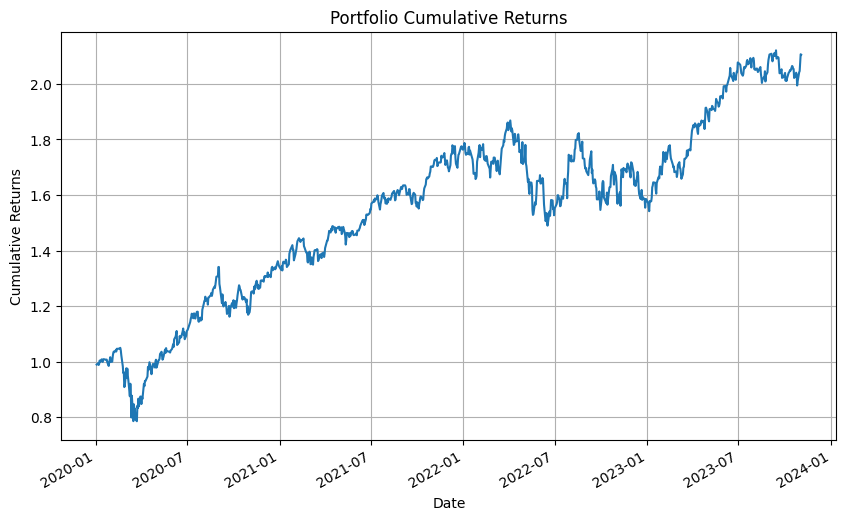

In [249]:
plt.figure(figsize=(10, 6))
portfolio_cumulative_returns.plot()
plt.title('Portfolio Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.grid(True)
plt.show()

In [250]:
portfolio_metrics = {
    'Total Return': (portfolio_cumulative_returns[-1] - 1) * 100,
    'Annualized Return': ((portfolio_cumulative_returns[-1]) ** (252 / len(portfolio_cumulative_returns)) - 1) * 100,
    'Annualized Volatility': portfolio_returns.std() * np.sqrt(252) * 100,
    'Sharpe Ratio': (portfolio_returns.mean() * 252) / (portfolio_returns.std() * np.sqrt(252))
}

for metric, value in portfolio_metrics.items():
    print(f'{metric}: {value:.2f}')


Total Return: 110.51
Annualized Return: 21.41
Annualized Volatility: 24.41
Sharpe Ratio: 0.92


## References

* https://www.pythonforfinance.net/2020/11/27/black-litterman-portfolio-allocation-model-in-python/